*La base des TPs pour le cours "Classification des donn√©es" a √©t√© prise du cours en ligne "Open Machine Learning Course" (https://mlcourse.ai/, auteur Yury Kashnitsky)*



# <center> TP 4 : Apprentissage non supervis√©: PCA et clustering

Dans ce TP, vous allez d√©couvrir le fonctionnement des m√©thodes observ√©es pr√©c√©demment : K-means, mod√®le de m√©lange gaussien (GMM) et clustering agglom√©ratif, dans les t√¢ches de clustering sur les donn√©es synth√©tiques.

Puis il vous faudra appliquer ses m√©thodes du clustering aux jeux de donn√©es r√©elles MNIST (t√¢che de reconnaissance manuscrite de chiffres).

**Votre travail consiste √† √©crire du code et effectuer des calculs dans les cellules ci-dessous.**

Tout d'abord, nous allons initialiser l'environnement, importons tout les biblioth√®ques n√©cessaires

In [80]:
### You code here ###
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## 1. K-means, GMM et clustering agglom√©ratif pour le clustering : donn√©es synth√©tiques

Dans cette partie de TP vous allez appliquer les m√©thodes du clustering indiqu√©es aux jeux de donn√©es synth√©tiques ci-dessous.

C:\Users\ELITEBOOK\AppData\Local\Temp\ipykernel_16496\2983515749.py:11: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X1[:, 0], X1[:, 1], s=30, cmap='viridis');


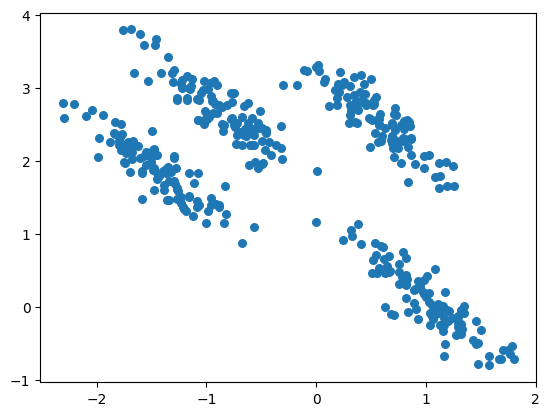

In [81]:
from sklearn.datasets import make_blobs

### 4 ordinary round clusters
X, y_true = make_blobs(n_samples=400, centers=4,
                       cluster_std=0.50, random_state=0)

### 4 ordinary elliptical clusters
rng = np.random.RandomState(13)
X1 = np.dot(X, rng.randn(2, 2))
y1_true = y_true 
plt.scatter(X1[:, 0], X1[:, 1], s=30, cmap='viridis');

C:\Users\ELITEBOOK\AppData\Local\Temp\ipykernel_16496\2016344880.py:13: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X2[:, 0], X2[:, 1], s=40, cmap='viridis');


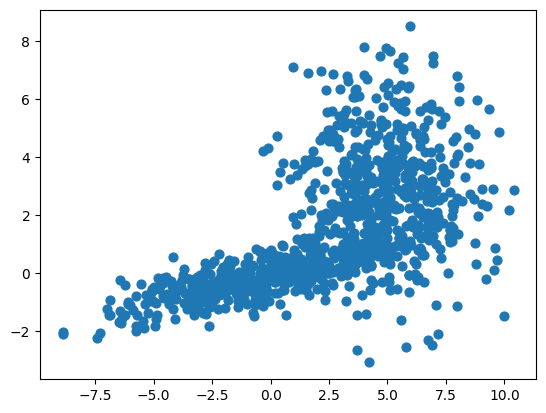

In [124]:
### 2 clusters with different gaussian distributions
np.random.seed(0)
n_samples = 500
X2_1 = 2.0*np.random.randn(n_samples, 2) + np.array([5, 3])
y2_1 = np.zeros(n_samples)
C = np.array([[0., -0.5], [3.5, .7]])
X2_2 = np.dot(np.random.randn(n_samples, 2), C)
y2_2 = np.ones(n_samples)

X2 = np.vstack([X2_1, X2_2])
y2_true = np.vstack([y2_1, y2_2])

plt.scatter(X2[:, 0], X2[:, 1], s=40, cmap='viridis');

**Ex. 1, 2** : 
S√©parez en clusters diff√©rents les donn√©es {X1} et {X2} en entra√Ænant les methodes [`K-means`](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html), [`GMM`](https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html) et [`clustering agglom√©ratif`](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html) via sklearn. 

Visualisez avec les couleurs diff√©rentes les clusters obtenus et les positions de `centers` (ou `means`). Calculez les mesures de qualit√© du clustering : [`ARI`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.adjusted_rand_score.html),	[`AMI`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.adjusted_mutual_info_score.html),	[`Homogenity`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.homogeneity_score.html),	[`Completeness`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.completeness_score.html),	[`V-measure`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.v_measure_score.html) et	[`Silhouette`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html). 

Quelle m√©thode a la meilleure performance pour chaque exemple de donn√©es ?

In [121]:
# You code here
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
model_kmeans=KMeans(n_clusters=4, random_state=0)
model_GMM=GaussianMixture(n_components=4)
model_agloclu=AgglomerativeClustering()

models=[model_kmeans,model_GMM,model_agloclu]

y_pred_kmeans_X1=model_kmeans.fit_predict(X1)
centrs_X1=model_kmeans.cluster_centers_

y_pred_GMM_X1=model_GMM.fit_predict(X1)
GMM_centrs_X1=model_GMM.means_


y_pred_egloclu_X1=model_agloclu.fit_predict(X1)
L, M=np.zeros((1,2)),np.zeros((1,2))
for i in range(len(y_pred_GMM_X1)) :
    if y_pred_GMM_X1[i]==0 :
        L=np.vstack((L,X1[i,:]))
    else :
        M=np.vstack((M,X1[i,:]))

L= np.delete(L,(0), axis = 0)
M = np.delete(M,(0), axis = 0)


y_pred_kmeans_X2=model_kmeans.fit_predict(X2)
centrs_X2=model_kmeans.cluster_centers_


y_pred_GMM_X2=model_GMM.fit_predict(X2)
GMM_centrs_X2=model_GMM.means_

y_pred_egloclu_X2=model_agloclu.fit_predict(X2)
P, T=np.zeros((1,2)),np.zeros((1,2))
for i in range(len(y_pred_GMM_X2)) :
    if y_pred_GMM_X2[i]==0 :
        P=np.vstack((P,X2[i,:]))
    else :
        T=np.vstack((T,X2[i,:]))

P= np.delete(P,(0), axis = 0)
T = np.delete(T,(0), axis = 0)

GMM_centrs_X1



array([[-1.44338843,  1.87089238],
       [ 1.01235505,  0.08636198],
       [-0.87346767,  2.68767259],
       [ 0.55579727,  2.55635917]])

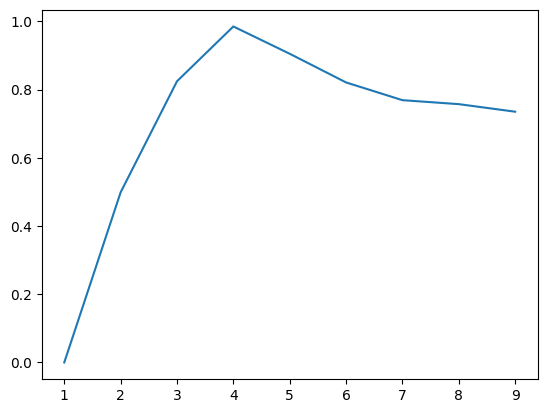

In [84]:
from sklearn.model_selection import validation_curve

train_score, val_score=validation_curve(model_kmeans,X1, y_pred_kmeans_X1,param_name='n_clusters',param_range=np.arange(1,10), cv=5,scoring='adjusted_mutual_info_score')
plt.plot(np.arange(1,10),val_score.mean(axis=1))

In [85]:
def Distance_KMeans(X) :
    L=[]    
    for n_clusters in range (1,15) :
        model=KMeans(n_clusters=n_clusters)
        y_predd=model.fit_predict(X)
        L.append(model.inertia_)
    plt.plot(np.arange(1,15), L)
    plt.xlabel('nbr de clusters')
    plt.ylabel('Distance')
    plt.grid()


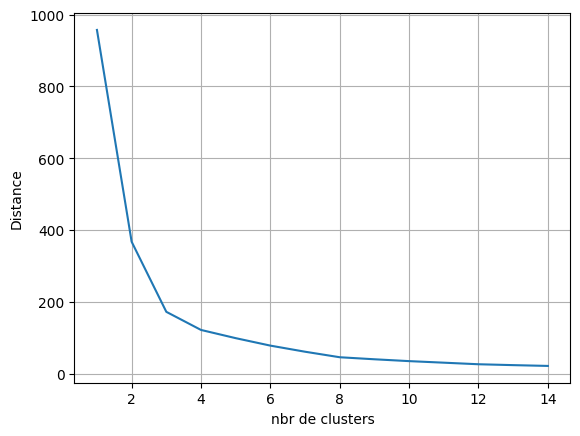

In [86]:
Distance_KMeans(X1)

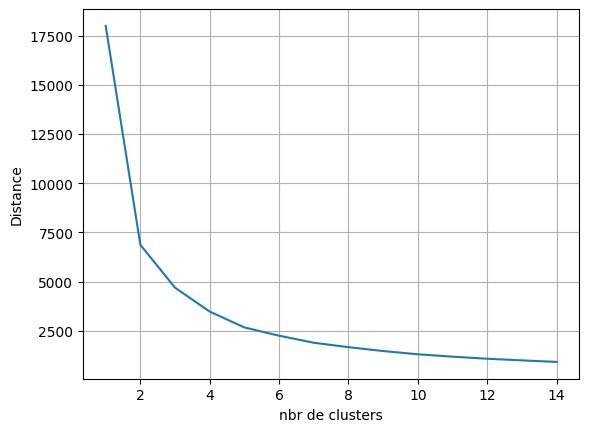

In [87]:
Distance_KMeans(X2)

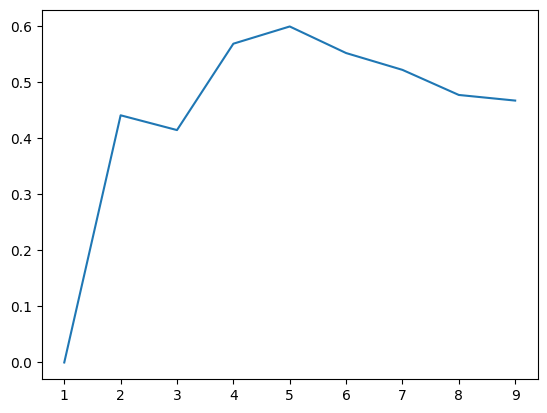

In [88]:
train_score, val_score=validation_curve(model_GMM,X2, y_pred_GMM_X2,param_name='n_components',param_range=np.arange(1,10), cv=5,scoring='adjusted_mutual_info_score')
plt.plot(np.arange(1,10),val_score.mean(axis=1))

In [119]:
def Average(lst):
    return sum(lst) / len(lst)

Text(0.5, 1.0, 'Aggro clustering sur X2')

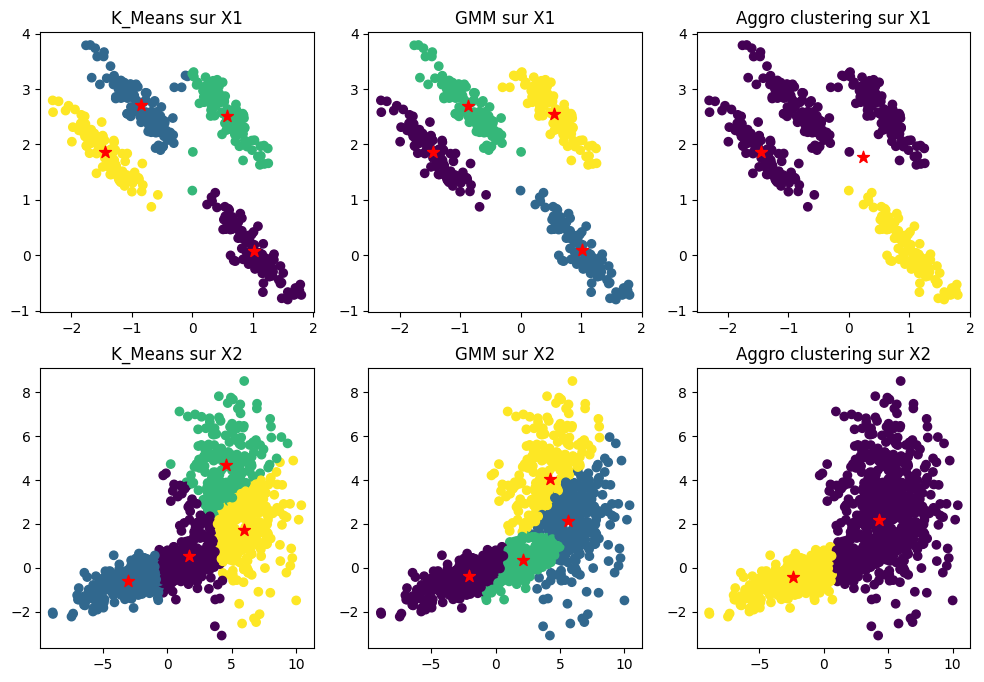

In [122]:
fig, ax=plt.subplots(2,3, figsize=(12,8))
ax[0,0].scatter(X1[:,0],X1[:,1],c=y_pred_kmeans_X1)
ax[0,0].scatter(centrs_X1[:,0], centrs_X1[:,1], s=80,c='r', marker='*')
ax[0,0].set_title('K_Means sur X1')

ax[0,1].scatter(X1[:,0],X1[:,1],c=y_pred_GMM_X1)
ax[0,1].scatter(GMM_centrs_X1[:,0], GMM_centrs_X1[:,1], s=80,c='r', marker='*')
ax[0,1].set_title('GMM sur X1')

ax[0,2].scatter(X1[:,0],X1[:,1],c=y_pred_egloclu_X1)
ax[0,2].scatter(Average(M[:,0]),Average(M[:,1]),s=80,c='r',marker='*')
ax[0,2].scatter(Average(L[:,0]),Average(L[:,1]),s=80,c='r',marker='*')
ax[0,2].set_title('Aggro clustering sur X1')

ax[1,0].scatter(X2[:,0],X2[:,1],c=y_pred_kmeans_X2)
ax[1,0].scatter(centrs_X2[:,0], centrs_X2[:,1], s=80,c='r', marker='*')
ax[1,0].set_title('K_Means sur X2')

ax[1,1].scatter(X2[:,0],X2[:,1],c=y_pred_GMM_X2)
ax[1,1].scatter(GMM_centrs_X2[:,0], GMM_centrs_X2[:,1], s=80,c='r', marker='*')
ax[1,1].set_title('GMM sur X2')

ax[1,2].scatter(X2[:,0],X2[:,1],c=y_pred_egloclu_X2)
ax[1,2].scatter(Average(P[:,0]),Average(P[:,1]),s=80,c='r',marker='*')
ax[1,2].scatter(Average(T[:,0]),Average(T[:,1]),s=80,c='r',marker='*')
ax[1,2].set_title('Aggro clustering sur X2')



 Calculez les mesures de qualit√© du clustering : [`ARI`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.adjusted_rand_score.html),	[`AMI`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.adjusted_mutual_info_score.html),	[`Homogenity`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.homogeneity_score.html),	[`Completeness`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.completeness_score.html),	[`V-measure`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.v_measure_score.html) et	[`Silhouette`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html).

In [127]:
from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score, homogeneity_score, completeness_score,v_measure_score,silhouette_score
models=[model_kmeans,model_GMM,model_agloclu]

y_pred=[y_pred_kmeans_X1,y_pred_GMM_X1,y_pred_egloclu_X1]
Metrics=pd.DataFrame({
    i:[adjusted_rand_score(j,y1_true),
    adjusted_mutual_info_score(j,y1_true),
    homogeneity_score(j,y1_true),
    completeness_score(j,y1_true),
    v_measure_score(j,y1_true),
    silhouette_score(X1,j)] 
    for i,j in zip (models,y_pred)},
    index=['ARI','AMI','Homogenity','Completeness','V-measure','Silhouette'])
Metrics

KMeans(n_clusters=4, random_state=0)  \
ARI                                       0.960676   
AMI                                       0.949031   
Homogenity                                0.949509   
Completeness                              0.949389   
V-measure                                 0.949449   
Silhouette                                0.549361   

              GaussianMixture(n_components=4)  AgglomerativeClustering()  
ARI                                  1.000000                   0.331658  
AMI                                  1.000000                   0.575511  
Homogenity                           1.000000                   1.000000  
Completeness                         1.000000                   0.405639  
V-measure                            1.000000                   0.577160  
Silhouette                           0.549338                   0.580542

In [132]:
y_pred_X2=[y_pred_kmeans_X2,y_pred_GMM_X2,y_pred_egloclu_X2]
MetricsX2=pd.DataFrame({
    i:[adjusted_rand_score(j,y2_true.reshape((1000,))),
    adjusted_mutual_info_score(j,y2_true.reshape((1000,))),
    homogeneity_score(j,y2_true.reshape((1000,))),
    completeness_score(j,y2_true.reshape((1000,))),
    v_measure_score(j,y2_true.reshape((1000,))),
    silhouette_score(X2,j)] 
    for i,j in zip (models,y_pred_X2)},
    index=['ARI','AMI','Homogenity','Completeness','V-measure','Silhouette'])

MetricsX2

KMeans(n_clusters=4, random_state=0)  \
ARI                                       0.258011   
AMI                                       0.353165   
Homogenity                                0.266371   
Completeness                              0.528023   
V-measure                                 0.354106   
Silhouette                                0.396838   

              GaussianMixture(n_components=4)  AgglomerativeClustering()  
ARI                                  0.335540                   0.364275  
AMI                                  0.406996                   0.409028  
Homogenity                           0.306560                   0.435173  
Completeness                         0.609137                   0.386652  
V-measure                            0.407858                   0.409480  
Silhouette                           0.342773                   0.522122

## 2. K-means, GMM et clustering agglom√©ratif pour le clustering : donn√©es r√©elles (MNIST)


Dans cette partie on va appliquer les m√©thodes de clustering √©tudi√©es sur les donn√©es int√©gr√© dans sklearn sur des chiffres manuscrits.

In [133]:
from sklearn.datasets import load_digits

digits = load_digits()
X, y_true = digits.data, digits.target

In [134]:
import seaborn as sns

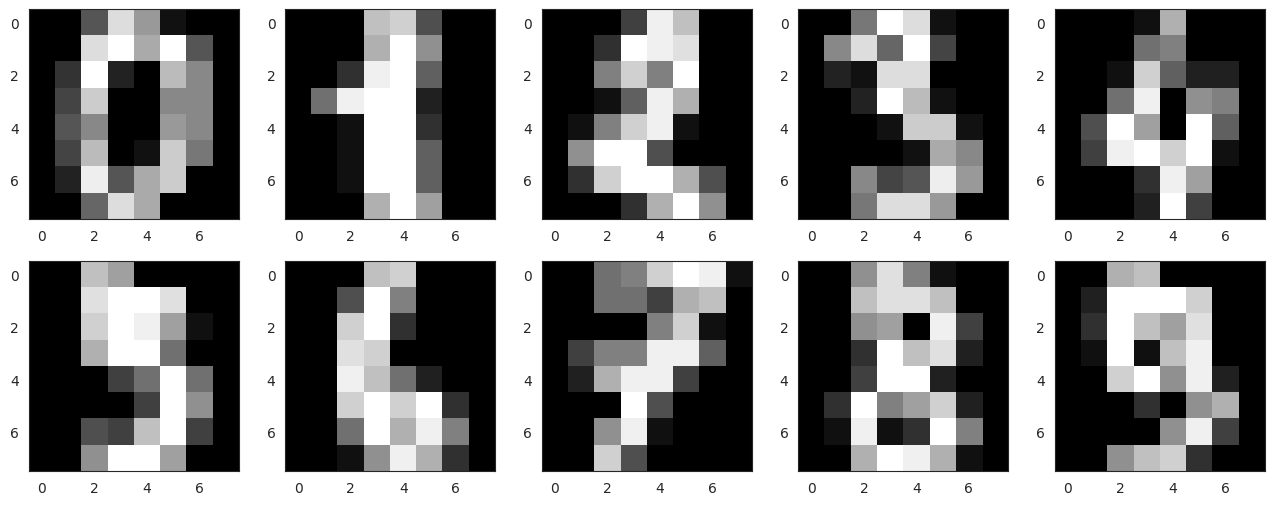

In [135]:
with sns.axes_style("white"):
  plt.figure(figsize=(16, 6))
  for i in range(10):
      plt.subplot(2, 5, i + 1)
      plt.imshow(X[i,:].reshape([8,8]), cmap='gray'); 

**Ex. 3** : Appliquez les m√©thodes [`K-means`](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html), [`GMM`](https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html) et [`clustering agglom√©ratif`](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html) aux donn√©es de chiffres manuscrits. Visualisez les centres de cluster sous forme d'images (c'est-√†-dire remodelez chacun en 8x8 et utilisez `plt.imshow`), les clusters semblent-ils √™tre corr√©l√©s avec des chiffres particuliers?

In [159]:
# You code here
#Xx=X.reshape((64,))
model1=KMeans(n_clusters=10)
model2=GaussianMixture()
model3=AgglomerativeClustering()
my_predict1=model1.fit_predict(X)
my_predict2=model2.fit_predict(X)
my_predict3=model3.fit_predict(X)



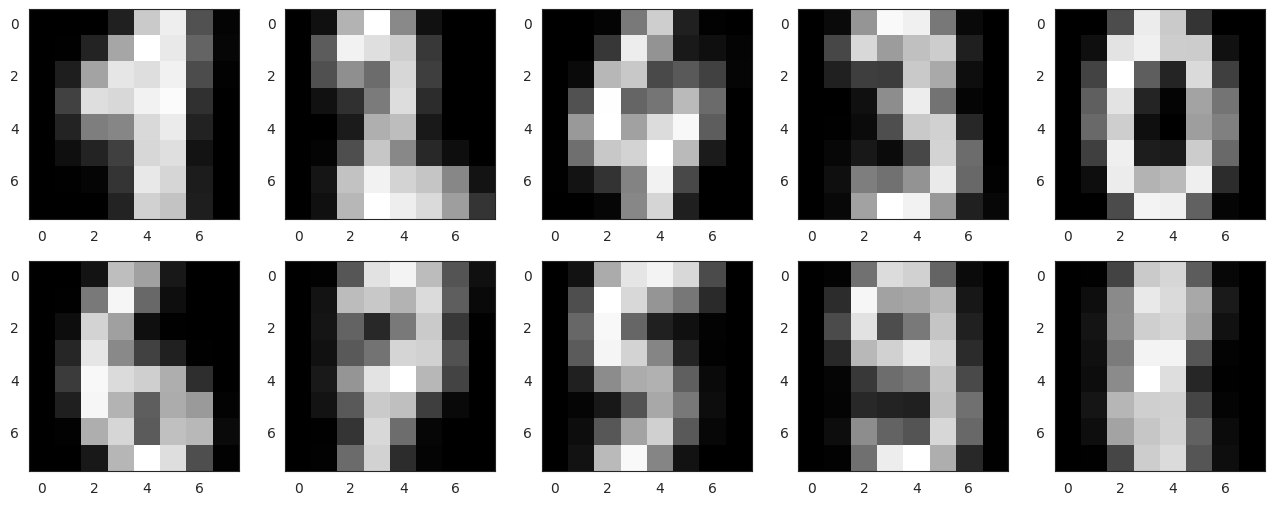

In [160]:
y=model1.cluster_centers_
y.shape
with sns.axes_style("white"):
  plt.figure(figsize=(16, 6))
  for i in range(10):
      plt.subplot(2, 5, i + 1)
      plt.imshow(y[i,:].reshape([8,8]), cmap='gray'); 


**Ex. 4** : Comparez les algorithmes d'Ex.3 √† l'aide de m√©triques de qualit√© du clustering : [`ARI`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.adjusted_rand_score.html),	[`AMI`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.adjusted_mutual_info_score.html),	[`Homogenity`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.homogeneity_score.html),	[`Completeness`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.completeness_score.html),	[`V-measure`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.v_measure_score.html) et	[`Silhouette`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html). 

In [ ]:
# You code here

# M√©mo sur les mesures de pr√©cision

Contrairement √† la classification, il est difficile d'√©valuer la qualit√© des r√©sultats du clustering. Ici, une m√©trique ne peut pas d√©pendre des √©tiquettes mais uniquement de la qualit√© de la division. Deuxi√®mement, nous n'avons g√©n√©ralement pas de v√©ritables √©tiquettes des observations lorsque nous utilisons le clustering.

Il existe des mesures de qualit√© *internes* et *externes*. Les m√©triques externes utilisent les informations sur la v√©ritable s√©paration connue tandis que les m√©triques internes n'utilisent aucune information externe et √©valuent la qualit√© des clusters en se basant uniquement sur les donn√©es initiales. Le nombre optimal de clusters est g√©n√©ralement d√©fini par rapport √† certaines m√©triques internes.

Toutes les m√©triques d√©crites ci-dessous sont impl√©ment√©es dans `sklearn.metrics`.

**Adjusted Rand Index (ARI)**

Ici, nous supposons que les v√©ritables √©tiquettes des objets sont connues. Cette m√©trique ne d√©pend pas des valeurs des √©tiquettes mais de la division du cluster de donn√©es. Soit $N$ le nombre d'observations dans un √©chantillon. Soit $a$ le nombre de paires d'observation avec les m√™mes √©tiquettes et situ√©es dans le m√™me cluster, et que $b$ soit le nombre de paires d'observation avec des √©tiquettes diff√©rentes et situ√©es dans diff√©rents clusters. L'indice Rand peut √™tre calcul√© √† l'aide de la formule suivante: $$\text{RI} = \frac{2(a + b)}{n(n-1)}.$$
En d'autres termes, il √©value une part de paires d'observation pour lesquelles ces divisions (r√©sultat initial et clustering) sont coh√©rentes. L'indice Rand (RI) √©value la similitude des deux divisions du m√™me √©chantillon. Pour que cet indice soit proche de z√©ro pour tout r√©sultat de clustering avec n'importe quel $n$ et nombre de clusters, il est essentiel de le mettre √† l'√©chelle, d'o√π l'indice Adjusted Rand Index: $$\text{ARI} = \frac{\text{RI} - E[\text{RI}]}{\max(\text{RI}) - E[\text{RI}]}.$$

Cette m√©trique est sym√©trique et ne d√©pend pas de la permutation d'√©tiquette. Par cons√©quent, cet indice est une mesure des distances entre diff√©rentes divisions d'√©chantillon. $\text{ARI}$ prend des valeurs dans la plage $[-1, 1]$. Les valeurs n√©gatives indiquent l'ind√©pendance des divisions et les valeurs positives indiquent que ces divisions sont coh√©rentes (elles correspondent √† $\text{ARI} = 1$).

**Adjusted Mutual Information (AMI)**

Cette m√©trique est similaire √† $\text{ARI}$. Elle est √©galement sym√©trique et ne d√©pend pas des valeurs et de la permutation des √©tiquettes. Il est d√©fini par la fonction [entropie](https://en.wikipedia.org/wiki/Entropy_(information_theory) et interpr√®te un √©chantillon divis√© comme une distribution discr√®te (la probabilit√© d'affecter √† un cluster est √©gal au pourcentage d'objets qu'il contient.) L'index $MI$ est d√©fini comme l'[information mutuelle](https://en.wikipedia.org/wiki/Mutual_information) pour deux distributions, correspondant √† l'√©chantillon divis√© en grappes. Intuitivement, les informations mutuelles mesurent la part des informations communes aux deux clusters, c'est-√†-dire comment les informations sur l'un d'entre eux diminuent l'incertitude de l'autre.

De la m√™me mani√®re que $\text{ARI}$, $\text{AMI}$ est d√©fini. Cela nous permet de nous d√©barrasser de l'augmentation de l'indice $MI$ avec le nombre de clusters. Le $\text{AMI}$ se situe dans la gamme $[0, 1]$. Des valeurs proches de z√©ro signifient que les divisions sont ind√©pendantes, et celles proches de 1 signifient qu'elles sont similaires (avec correspondance compl√®te √† $\text{AMI} = 1$).

**Homog√©n√©it√©, exhaustivit√©, V-mesure**

Formellement, ces m√©triques sont √©galement d√©finies en fonction de la fonction d'entropie et de la fonction d'entropie conditionnelle, interpr√©tant les r√©partitions d'√©chantillon comme des distributions discr√®tes: $$h = 1 - \frac{H(C\mid K)}{H(C)}, c = 1 - \frac{H(K\mid C)}{H(K)},$$
o√π $K$ est un r√©sultat de clustering et $C$ est la division initiale. Par cons√©quent, $h$ √©value si chaque cluster est compos√© des m√™mes objets de classe, et $c$ mesure dans quelle mesure les m√™mes objets de classe s'adaptent aux clusters. Ces m√©triques ne sont pas sym√©triques. Les deux se situent dans la plage $[0, 1]$, et des valeurs plus proches de 1 indiquent des r√©sultats de clustering plus pr√©cis. Les valeurs de ces m√©triques ne sont pas mises √† l'√©chelle comme le sont les m√©triques $\text{ARI}$ ou $\text{AMI}$ et d√©pendent donc du nombre de clusters. Un r√©sultat de clustering al√©atoire n'aura pas de valeurs de mesures plus proches de z√©ro lorsque le nombre de clusters est suffisamment grand et le nombre d'objets est petit. Dans un tel cas, il serait plus raisonnable d'utiliser $\text{ARI}$. Cependant, avec un grand nombre d'observations (plus de 100) et un nombre de grappes inf√©rieur √† 10, ce probl√®me est moins critique et peut √™tre ignor√©.

$V$-mesure (ùëâ-measure) est une combinaison de $h$ et $c$ et est leur moyenne harmonique:
$$v = 2\frac{hc}{h+c}.$$
Il est sym√©trique et mesure la coh√©rence de deux r√©sultats de regroupement.

**Silhouette**

Contrairement aux m√©triques d√©crites ci-dessus, ce coefficient n'implique pas la connaissance des v√©ritables √©tiquettes des objets. Il nous permet d'estimer la qualit√© du clustering en utilisant uniquement l'√©chantillon initial sans √©tiquette et le r√©sultat du clustering. Pour commencer, pour chaque observation, le coefficient de silhouette est calcul√©. Soit $a$ la moyenne de la distance entre un objet et d'autres objets au sein d'un cluster et $b$ la distance moyenne d'un objet aux objets du cluster le plus proche (diff√©rente de celle √† laquelle appartient l'objet). Ensuite, la mesure de silhouette pour cet objet est $$s = \frac{b - a}{\max(a, b)}.$$

La silhouette d'un √©chantillon est une valeur moyenne des valeurs de silhouette de cet √©chantillon. Par cons√©quent, la distance de la silhouette montre dans quelle mesure la distance entre les objets d'une m√™me classe diff√®re de la distance moyenne entre les objets de diff√©rents groupes. Ce coefficient prend des valeurs dans la plage $[-1, 1]$. Des valeurs proches de -1 correspondent √† de mauvais r√©sultats de clustering tandis que des valeurs plus proches de 1 correspondent √† des clusters denses et bien d√©finis. Par cons√©quent, plus la valeur de silhouette est √©lev√©e, meilleurs sont les r√©sultats du clustering.

√Ä l'aide de silhouette, nous pouvons identifier le nombre optimal de grappes $k$ (si nous ne le savons pas d√©j√† √† partir des donn√©es) en prenant le nombre de grappes qui maximise le coefficient de silhouette.